# Settings
## Goal: Generate standardize report for a cohort
## Data: Diabetes
## Analysis
- Overall statistics
- Statistics
- 

# Scenario
## I am an analyst that need to report on readmisstion rate for diabetes patient in hospital admission setting. 
*Focus on cohort admitted with diabetes and primary diagnosis*
### Descriptive analytics
# Overall
# Number of encounter
# Distribution by Age
# Distribution by Geneder

# Utilization
# - Distribution by Medical Condition
# - Distrituion Admission Type
# - Distribution Medication
# - Distribution by Insurance Provider

# Financial

# Total Billing Amount
# Total Bill Amount by Condition
# Total Bill Amount by Medical Condition
# Avg Bill Amount by encounter

### Statistical analytics
1) Different between readmission rate (with vs without AICtest)
2) Time in hospital (with or without AICtest)
3) Different between 'number_outpatient', 'number_emergency', 'number_inpatient' (across payer code)
4) 

### Identify insights/ findings
1) Compare across 5 different payers
2) 

## References:
### Data: 
- Diabetes 130-US Hospitals for Years 1999-2008 https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008
- Publication: Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Record https://www.hindawi.com/journals/bmri/2014/781670/

# Data import and pre-processing
- Data was pre-preprocessed and simplified for ease of analysis for demonstration purposes.  Below are the criterias:
    - Subset data to five payers: {'MC', 'HM', 'SP', 'BC', 'MD'}
    - Rename 

In [128]:
start_date = pd.to_datetime('2022-04-01')
end_date = pd.to_datetime('2023-05-31')


In [129]:
# person as entity
def age_group_range(age):
    if age < 18:
        return 'age_group_0_to_17'
    elif age < 35:
        return 'age_group_18_to_34'
    elif age < 50:
        return 'age_group_35_to_49'
    elif age < 65:
        return 'age_group_50_to_64'
    else:
        return 'age_group_above_65'

In [173]:
import pandas as pd  # type: ignore
import numpy as np # type: ignore

start_date = pd.to_datetime('2022-04-01')
end_date = pd.to_datetime('2023-05-31')

# import data
df = pd.read_csv('/Downloads/healthcare_dataset.csv')

# convert date in string type to datetime
date_col = ['Date of Admission', 'Discharge Date']
for col in date_col:
    df[col] = pd.to_datetime(df[col])

# add end of month columns for date field
df['admission_EOM_date'] = df['Date of Admission'].apply(lambda x: x + pd.offsets.MonthEnd(0))
df['discharge_EOM_date'] = df['Discharge Date'].apply(lambda x: x + pd.offsets.MonthEnd(0))

# add encounter_id 
df['encounter_id'] = df.index + 101

# add age_group column
def age_group_range(age):
    if age < 18:
        return 'age_group_0_to_17'
    elif age < 35:
        return 'age_group_18_to_34'
    elif age < 50:
        return 'age_group_35_to_49'
    elif age < 65:
        return 'age_group_50_to_64'
    else:
        return 'age_group_above_65'
df['age_group'] = df['Age'].apply(lambda x: age_group_range(x))

# compute LOS
df['length_of_stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# subset data based on date range
df = df[(df['Date of Admission']>=start_date) & (df['Date of Admission']<end_date)]

(55500, 20)
(11091, 20)


# Compute descriptive metrics

In [240]:
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'admission_EOM_date',
       'discharge_EOM_date', 'encounter_id', 'age_group', 'length_of_stay'],
      dtype='object')


In [163]:
## Overview metrics

# Number of encounters
total_encounter_count = df['encounter_id'].nunique()
# Number of patients
total_patient_count = df['Name'].nunique()

## Utilization Metrics

# Distribution by Age
age_dist = df.groupby('age_group')['encounter_id'].size().reset_index().rename(columns={'encounter_id':'encounterCount'}).to_string()
# Distribution by Gender
gender_dist = df.groupby('Gender')['encounter_id'].size().reset_index().rename(columns={'encounter_id':'encounterCount'}).to_string()
# - Distribution by Medical Condition
condition_dist = df.groupby('Medical Condition')['encounter_id'].size().reset_index().rename(columns={'encounter_id':'encounterCount'}).to_string()
# - Distrituion Admission Type
admit_dist = df.groupby('Admission Type')['encounter_id'].size().reset_index().rename(columns={'encounter_id':'encounterCount'}).to_string()
# - Distribution Medication
med_dist = df.groupby('Medication')['encounter_id'].size().reset_index().rename(columns={'encounter_id':'encounterCount'}).to_string()
# - Distribution by Insurance Provider
ins_dist = df.groupby('Insurance Provider')['encounter_id'].size().reset_index().rename(columns={'encounter_id':'encounterCount'}).to_string()

## Financial Metrics

# Total Billing Amount
total_bill_amount = df['Billing Amount'].sum()
# Total Bill Amount by Condition
total_amount_by_cond = df.groupby('Medical Condition')['Billing Amount'].sum().reset_index().rename(columns={'Billing Amount':'total_bill_amount'}).to_string()
# Total Bill Amount by Medical Condition
total_amount_by_med = df.groupby('Medication')['Billing Amount'].sum().reset_index().rename(columns={'Billing Amount':'total_bill_amount'}).to_string()
# Avg Bill Amount by encounter
avg_enc_amount = df['Billing Amount'].sum()/df['encounter_id'].nunique()
# Median Bill Amount by encounter
median_enc_amount = df['Billing Amount'].median()



In [242]:
descriptive_summary = f"Section 1: Descriptive analytics\n\
Analysis was conduction with data between {start_date.strftime('%Y-%m-%d')} and {end_date.strftime('%Y-%m-%d')}\n\n\
Overview analysis\n\
- Number of hospital admission = {total_encounter_count}\n\
- Distribution by encounter by age groups:\n\
    {age_dist}\n\n\
- Distribution by encounter by gender:\n\
    {gender_dist}\n\n\
Utilization analysis\n\
- Distribution by encounter by medical conditions:\n\
    {condition_dist}\n\n\
- Distribution by encounter by admission types:\n\
    {admit_dist}\n\n\
- Distribution by encounter by medications:\n\
    {med_dist}\n\n\
- Distribution by encounter by insurance providers:\n\
    {ins_dist}\n\n\
Financial analysis\n\
- Total bill amount = ${total_bill_amount:.2f}\n\
- Average bill amount per encounter = ${avg_enc_amount:.2f}\n\
- Median bill amount per encounter = ${median_enc_amount:.2f}\n\
- Distribution by total bill amount by medical condition:\n\
    {total_amount_by_cond}\n\n\
- Distribution by total bill amount by medication:\n\
    {total_amount_by_med}"

print(descriptive_summary)

Section 1: Descriptive analytics
Analysis was conduction with data between 2022-06-01 and 2023-05-31

Overview analysis
- Number of hospital admission = 11091
- Distribution by encounter by age groups:
                age_group  encounterCount
0   age_group_0_to_17              32
1  age_group_18_to_34            2737
2  age_group_35_to_49            2454
3  age_group_50_to_64            2528
4  age_group_above_65            3340

- Distribution by encounter by gender:
       Gender  encounterCount
0  Female            5536
1    Male            5555

Utilization analysis
- Distribution by encounter by medical conditions:
      Medical Condition  encounterCount
0         Arthritis            1892
1            Asthma            1779
2            Cancer            1857
3          Diabetes            1907
4      Hypertension            1831
5           Obesity            1825

- Distribution by encounter by admission types:
      Admission Type  encounterCount
0       Elective            3

In [ ]:
<li>For the period in examination, we had a total of 11,091 hospital admissions.</li>
            <li>The age group above 65 recorded the highest number of admissions (3340) followed closely by age groups 18 to 34, 35 to 49 and 50 to 64.</li>
            <li>Gender distribution was fairly even with males accounting for 5555 encounters and females 5536 encounters.</li>
            <li>Diabetes was the most prevalent medical condition followed closely by Arthritis and Cancer, all having slightly above 1800 cases.</li>
            <li>Most common admission type was Elective followed closely by Emergency and Urgent.</li>
            <li>Aspirin and Ibuprofen were the most common medications linked to hospital encounters.</li>
            <li>The dataset presented a well balanced spread across various insurance providers - Aetna, Blue Cross, Cigna, Medicare and UnitedHealthcare</li>
            <li>The total bill amount for the year-long period was $281,811,328.01</li>
</ul>

<h2>Section 1: Descriptive Analysis</h2>

<h3>Utilization Analysis</h3>
<p>The age group with the highest encounter was 'above 65' with 3340 encounters while the group '0_to_17' had the lowest encounters at 32. Encounters were equally distributed across genders. In terms of medical conditions, Arthritis recorded the highest number of encounters, closely followed by Diabetes, Cancer, Hypertension, Obesity, and Asthma. As per admission types, Elective recorded the highest encounters with 3770, followed by Emergency and Urgent closely behind.</p>

<h3>Financial Analysis</h3>
<p>The total bill amount for the year of analysis amounted to $281,811,328.01 with an average bill amount of $25,409.01 per encounter. By medical condition, Arthritis recorded the highest total bill amount while Asthma had the lowest. As per medication, Ibuprofen led to the highest total bill amount, with Aspirin closely behind.</p>

<h2>Section 2: Advanced Analysis</h2>
<p>A t-test was conducted to determine if the billing amount is statistically significantly higher for patients with abnormal or inconclusive test results. Only Medicare showed a statistically significant difference with p=0.048637 and a higher mean billing amount.</p>

<h3>Correlation Analysis</h3>
<p>The correlation between patient's age and billing amount was found to be positively correlated, albeit weakly. Additionally, age and length of stay were positively correlated, whereas billing amount and length of stay were negatively correlated.</p>

<h3>Forecast of Billing Amount</h3>
<p>The forecasted billing amount for the months of July, August, and September 2023 are approximately $22,215,350, $21,920,770, and $21,743,230 respectively.</p>

### Statistical analytics
1) Hypothesis test with T-test
2) Correlation
3) Forecasting

In [172]:
# Hypothesis: Encounter with abnormal or inconclusive test result has higher billing amount per encounter
# Statistically significant value: P-value < 0.05 

from scipy.stats import ttest_ind

insurance_provider_list = df['Insurance Provider'].unique()
res_df = pd.DataFrame()
for ins in insurance_provider_list:
    res = pd.DataFrame({'insurance_provider':ins}, index=[0])
    cohort_a = df[
        (df['Test Results']!='Normal') &
        (df['Insurance Provider']==ins)]
    cohort_b = df[
        (df['Test Results']=='Normal') &
        (df['Insurance Provider']==ins)]
    stat_ttest, p_ttest = ttest_ind(cohort_a['Billing Amount'], cohort_b['Billing Amount'])
    res['t_test_stat'] = stat_ttest
    res['p_value'] = p_ttest
    res['mean_bill_amount_reference'] = round(cohort_b['Billing Amount'].mean(),0)
    res['mean_bill_amount_target'] = round(cohort_a['Billing Amount'].mean(),0)
    res['percent_deviate'] = round((res['mean_bill_amount_target']-res['mean_bill_amount_reference'])/res['mean_bill_amount_reference']*100,2)
    res['change_direction'] = np.where(res['percent_deviate']<0, 'lower', 
                                       np.where(res['percent_deviate']>0, 'higher', 'no change'))

    res_df = pd.concat([res_df, res])

ttest_string_df = res_df.to_string()

    

,insurance_provider,t_test_stat,p_value,mean_bill_amount_reference,mean_bill_amount_target,percent_deviate,change_direction
0,Aetna,0.392390,0.694809,25394.0,25651.0,1.01,higher
0,Blue Cross,-0.410576,0.681424,25532.0,25269.0,-1.03,lower
0,Cigna,0.792691,0.428041,25136.0,25644.0,2.02,higher
0,UnitedHealthcare,0.373760,0.708618,25163.0,25404.0,0.96,higher
0,Medicare,1.972803,0.048637,24499.0,25726.0,5.01,higher


In [198]:
import itertools

continuous_var = ['Age', 'Billing Amount', 'length_of_stay']
pair_var_list = list(itertools.combinations(continuous_var, 2))

corr_res = pd.DataFrame()
for cols in pair_var_list:
    res = pd.DataFrame({
        'var_1':cols[0],
        'var_2':cols[1],
        'correlation_coefficient': df[cols[0]].corr(df[cols[1]])
        }, index=[0])
    corr_res = pd.concat([corr_res, res])

corr_res['direction'] = np.where(corr_res['correlation_coefficient']<0, 'negatively correlated', 'positively correlated')
corr_res_string = corr_res.to_string()

/Users/jasmine/opt/anaconda3/envs/anaconda_py311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasmine/opt/anaconda3/envs/anaconda_py311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasmine/opt/anaconda3/envs/anaconda_py311/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/jasmine/opt/anaconda3/envs/anaconda_py311/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

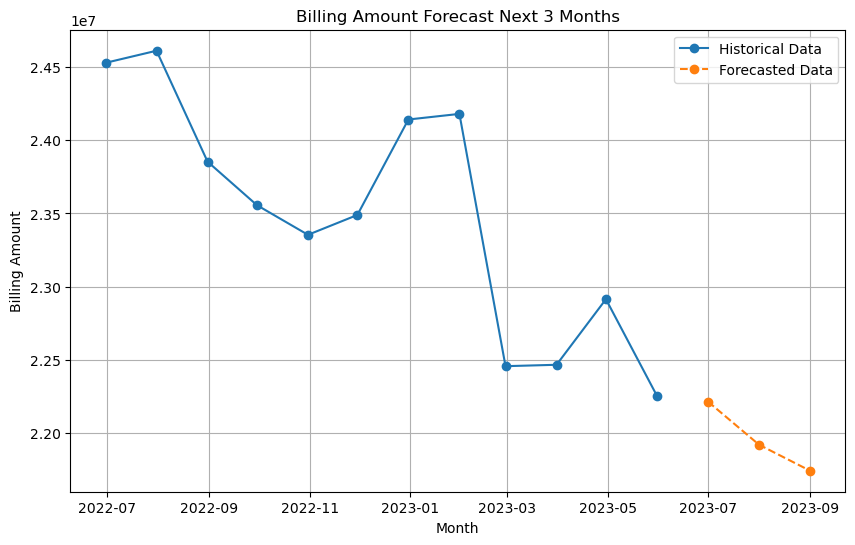

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

arima_df = df.groupby('admission_EOM_date')['Billing Amount'].sum().reset_index().sort_values('admission_EOM_date')
arima_df['admission_EOM_date'] = pd.to_datetime(arima_df['admission_EOM_date'])
arima_df.set_index('admission_EOM_date', inplace=True)

# Build and Fit ARIMA Model
model = ARIMA(arima_df['Billing Amount'], order=(2, 1, 2))  # Order can be fine-tuned
fitted_model = model.fit()

# Forecast the next 3 months
forecast_steps = 3
forecast = fitted_model.forecast(steps=forecast_steps)

# Create forecast dates
forecast_dates = pd.date_range(arima_df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

# Combine historical data and forecast
forecast_df = pd.DataFrame({
    "Month": forecast_dates,
    "forecasted_billing_amount": forecast.values
})
forecast_df.set_index("Month", inplace=True)

# Visualize forecast
plt.figure(figsize=(10, 6))
plt.plot(arima_df.index, arima_df['Billing Amount'], marker='o', label="Historical Data")
plt.plot(forecast_df.index, forecast_df['forecasted_billing_amount'], marker='o', label="Forecasted Data", linestyle='--')
plt.title("Billing Amount Forecast Next 3 Months")
plt.xlabel("Month")
plt.ylabel("Billing Amount")
plt.grid()
plt.legend()
plt.show()

# Print Forecasted Values
forecast_df = forecast_df.reset_index()
forecast_df_string = forecast_df.to_string()


In [212]:
advanced_analytics_summary = f"Section 2: Advanced analytics\n\
Advanced analysis was conduction with data between {start_date.strftime('%Y-%m-%d')} and {end_date.strftime('%Y-%m-%d')}\n\n\
Hypothesis: Encounter with abnormal or inconclusive test result is statistical signficantly higher in billing amount per encounter\n\
Statistically significant if P-value < 0.05 \n\
- Result table to test for billing amount being higher for patients with abnormal or inconclusive test result:\n\n\
    {ttest_string_df}\n\n\
Correlation between continuous variables\n\
- Result table to measure correlation between two continuous variables:\n\n\
    {corr_res_string}\n\n\
Forecast of billing amount for the next three months\n\
- Result table to forecast for billing amount for the next three months:\n\n\
    {forecast_df_string}"

print(advanced_analytics_summary)

Section 2: Advanced analytics
Advanced analysis was conduction with data between 2022-06-01 and 2023-05-31

Hypothesis: Encounter with abnormal or inconclusive test result is statistical signficantly higher in billing amount per encounter
Statistically significant if P-value < 0.05 
- Result table to test for billing amount being higher for patients with abnormal or inconclusive test result:

      insurance_provider  t_test_stat   p_value  mean_bill_amount_reference  mean_bill_amount_target  percent_deviate change_direction
0              Aetna     0.392390  0.694809                     25394.0                  25651.0             1.01           higher
0         Blue Cross    -0.410576  0.681424                     25532.0                  25269.0            -1.03            lower
0              Cigna     0.792691  0.428041                     25136.0                  25644.0             2.02           higher
0   UnitedHealthcare     0.373760  0.708618                     25163.0     

In [243]:
# Setup final PROMPT
PROMPT_ = f"""
Write me a summary describing the finding of inpatient hospital data for a selection year. 
There are two sections of analysis with section 1 as descriptive and section 2 as advanced analytics.
In the report, make sure
- Highilght the time range for the analysis
- Start with Highlights of analysis in bullet points with most interesting insights identified in the analysis
- Follow up by in-depth analysis for each of the sections by providing apprepropriate context for each measurements
- For Descriptive analysis, extract interesting insights for each metrics such as highest, lowest, percent deviation, fold changes etc.
- For Advanced analytics, extract statistically significant interesting insights for each metrics. Report exact numbers of forecasted amount.
- Conclude findings with areas of attentions.  
Here is the analytics output:
{descriptive_summary}

{advanced_analytics_summary}
"""

# print(PROMPT_)

In [244]:
SYSTEMS_="""
You are an analyst writing a report based on metrics computed, derive insights and findings for reporting. 
    Output response in HTML format with title and subtitiles
"""

In [245]:
import openai
import os
from dotenv import load_dotenv

load_dotenv()
# Function to make an API call to OpenAI's GPT model
openai_api_key = os.getenv('OPENAI_API_KEY')

def generate_response(text, system):

    """
    Function to send a prompt to OpenAI and receive a response.
    
    :param prompt: Text input for the OpenAI model.
    :param model: Model to use, e.g., "gpt-3.5-turbo" or "gpt-4".
    :param max_tokens: Maximum number of tokens in the response.
    :return: Response text from the OpenAI model.
    """
    
    # Set your OpenAI API key
    openai.api_key = f'{openai_api_key}'
    
    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": text}

    ]
    try:
        response = openai.chat.completions.create(
            model="gpt-4",
            messages = messages
        )
    
        return response.choices[0].message.content.strip()
    
    except openai.OpenAIError as e:
        print(f"An error occurred: {e}")
        
        return None


In [231]:
result = generate_response(PROMPT_, SYSTEMS_)
print("AI Response:", result)

AI Response: # Analysis of Inpatient Hospital Data - Insights & Findings

The report presents the findings from the analysis of inpatient hospital data over the span of a year, i.e., from June 2022 to May 2023. The study involves two major sections: Descriptive analysis, which provides insights on the data characteristics, and Advanced analytics, which uncovers deeper patterns and trends.
   
## Key Highlights:

- The total number of hospital admissions recorded was 11,091
- Age distribution was highest for the 65+ age group, comprising 30.1% (3340) of total admissions
- Gender distribution was almost identical, with females and males making up 49.9% (5536) and 50.1% (5555) of the total admittees respectively
- The inpatient population was plagued predominantly by Diabetes (17.2% encounter rate)
- Elective admissions accounted for the bulk of admissions with 34.0% (3770) share
- Aspirin was the most encountered medication in the analysis with a 20.7% encounter rate
- Medicare was the l

In [246]:
result = generate_response(PROMPT_, SYSTEMS_)
print("AI Response:", result)

AI Response: <!DOCTYPE html>
<html>
<head>
    <title>Inpatient Hospital Data Analysis</title>
</head>
<body>
    <h1>Inpatient Hospital Data Analysis</h1>
    <h2>Time frame for analysis: June 1, 2022 - May 31, 2023</h2>
    
    <h3>Highlights:</h3>
    <ul>
        <li>The number of hospital admissions was 11,091.</li>
        <li>The age group with the highest hospital encounters was those above 65 years old(3340 encounters).</li>
        <li>The most common admission type was elective(3770 encounters).</li>
        <li>The most common insurance provider was Medicare(2312 encounters).</li>
        <li>The total bill amount was approximately $281,811,328.01.</li>
    </ul>

    <h2>Section 1: Descriptive Analysis</h2>
    <h3>Detailed Analysis:</h3>
    <!-- Full Descriptive Analysis Details Here -->

    <h2>Section 2: Advanced Analytics</h2>
    <h3>Detailed Analysis:</h3>
    <!-- Full Advanced Analytics Details Here -->

    <h2>Test for Higher Billing Amount Result:</h2>
    <p

In [232]:
SYSTEMS_HTML="""
You are an analyst writing a report based on metrics computed, derive insights and findings for reporting. 
    Output response in HTML format with title and subtitiles
"""
result_html = generate_response(PROMPT_, SYSTEMS_)
print("AI Response:", result_html)
# Save the HTML to a file
output_file = "healthcare_yearly_report.html"
with open(output_file, "w") as file:
    file.write(result_html)

# Provide a message with the file location
print(f"HTML file saved at: {os.path.abspath(output_file)}")

AI Response: <html>
<h1>Report on Inpatient Hospital Data Analysis</h1>
<h2>Time Range of Analysis</h2>
<p>The analysis was conducted on inpatient data from 2022-06-01 to 2023-05-31.</p>

<h2>Highlights of Analysis</h2>
<ul>
    <li>Most hospital admission facts were within the age group of 65 and above followed by adults between 50-64 years</li>
    <li>Gender distribution of patients shows a near-equal split with females slightly outnumbering males</li>
    <li>Arthritis and Diabetes were the most common medical conditions leading to hospitalizations</li>
    <li>Most encounters were elective admissions, closely followed by emergency and urgent admissions</li>
    <li>Most patients were noted to be on aspirin, followed closely by Ibuprofen, Lipitor, and Penicillin</li>
    <li>Most encounters were covered by Medicare insurance followed closely by Cigna</li>
    <li>The total bill for the year of analysis amounted to $281,811,328.01 with an average bill amount of $25,409.01 per encoun

In [247]:
SYSTEMS_HTML="""
You are an analyst writing a report based on metrics computed, derive insights and findings for reporting. 
    Output response in HTML format with title and subtitiles
"""
result_html = generate_response(PROMPT_, SYSTEMS_)
print("AI Response:", result_html)
# Save the HTML to a file
output_file = "healthcare_yearly_report.html"
with open(output_file, "w") as file:
    file.write(result_html)

# Provide a message with the file location
print(f"HTML file saved at: {os.path.abspath(output_file)}")

AI Response: <html>
    <head>
        <title>Inpatient Hospital Data Analysis Summary</title>
    </head>
    <body>
        <h1 style="text-align:center;">Inpatient Hospital Data Analysis Summary</h1>

        <p>The analysis was conducted for the span from June 1, 2022 to May 31, 2023, which provided interesting and valuable insights from the year-long inpatient hospital data.</p>

        <h2>Highlights of Analysis</h2>
        <ul>
            <li>For the period in examination, we had a total of 11,091 hospital admissions.</li>
            <li>The age group above 65 recorded the highest number of admissions (3340) followed closely by age groups 18 to 34, 35 to 49 and 50 to 64.</li>
            <li>Gender distribution was fairly even with males accounting for 5555 encounters and females 5536 encounters.</li>
            <li>Diabetes was the most prevalent medical condition followed closely by Arthritis and Cancer, all having slightly above 1800 cases.</li>
            <li>Most comm

In [250]:
import os
from sendgrid import SendGridAPIClient
from sendgrid.helpers.mail import Mail

def send_test_email(to_email):
    message = Mail(
        from_email='jasminewilkerson@gmail.com',
        to_emails=to_email,
        subject='Please review Inpatient hospitalization analysis',
        html_content=result_html
    )
        # html_content='<strong>This is a test email sent with SendGrid and Python.</strong>'

    try:
        sg = SendGridAPIClient(os.environ.get('SENDGRID_API_KEY'))
        response = sg.send(message)
        print("Email sent successfully:", response.status_code)
    except Exception as e:
        print("Error sending email:", e)

if __name__ == "__main__":
    to_email = input("Enter the email address to send the test email: ")
    send_test_email(to_email)

Email sent successfully: 202


In [239]:
import kagglehub

# Download latest version
# path = kagglehub.dataset_download("prasad22/healthcare-dataset")
# Define the dataset and download directory
kagglehub.auth()

dataset_identifier = "prasad22/healthcare-dataset"  # Replace with your dataset ID
download_directory = "/Users/jasmine/Downloads"  # Replace with your directory path

# Download dataset
kagglehub.dataset_download(dataset_identifier, path=download_directory)

print(f"Dataset downloaded and extracted to {download_directory}")

# print("Path to dataset files:", path)
# Path to dataset files: /Users/jasmine/.cache/kagglehub/datasets/prasad22/healthcare-dataset/versions/2

TypeError: 'module' object is not callable